In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
import time

In [2]:
# Loading Dataset
data_path = '/content/Final_merged_data.csv'
df = pd.read_csv(data_path)

In [3]:
# Dropping 'Country' column since it contains only one unique value ('Indonesia')
df_processed = df.drop('Country', axis=1)

In [4]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   720 non-null    int64  
 1   Item                   720 non-null    object 
 2   Rainfall (mm)          720 non-null    float64
 3   Temperature (Celcius)  720 non-null    float64
 4   Yield (hg/ha)          720 non-null    int64  
 5   Pesticides (Tons)      720 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 33.9+ KB


In [5]:
# Separating target variable and features
X = df_processed.drop('Yield (hg/ha)', axis = 1)
y = df_processed['Yield (hg/ha)']

In [6]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X)  # This will encode categorical columns in X

In [7]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [8]:
# Search for the optimal hyperparamaters for XGBoost using GridSearch

from sklearn.model_selection import GridSearchCV

ridge_reg = Ridge()

param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

search = GridSearchCV(ridge_reg, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'alpha': 0.1}


In [9]:
# Training the Ridge Regression model
start_training_time = time.time()
ridge_reg = Ridge(alpha = search.best_params_["alpha"])
ridge_reg.fit(X_train, y_train)
end_training_time = time.time()
training_time = end_training_time - start_training_time

In [10]:
# Making predictions
start_prediction_time = time.time()
y_pred_ridge = ridge_reg.predict(X_test)
end_prediction_time = time.time()
prediction_time = end_prediction_time - start_prediction_time

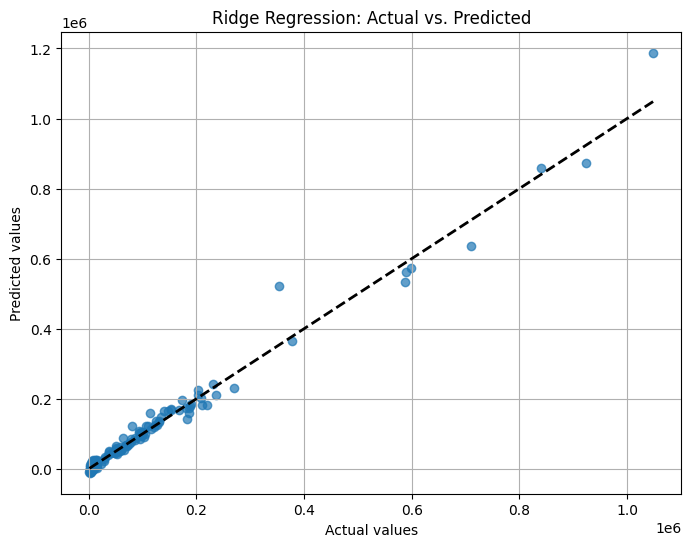

In [11]:
# Plotting actual vs. predicted values for Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.grid(True)
plt.show()


In [12]:
# Displaying evaluation metrics and time taken
r2 = r2_score(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
max_err = max_error(y_test, y_pred_ridge)
mape = mean_absolute_percentage_error(y_test, y_pred_ridge)

print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Max Error: {max_err:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

R-squared (R2): 0.98
Mean Absolute Error (MAE): 12298.86
Mean Squared Error (MSE): 559630788.36
Root Mean Squared Error (RMSE): 23656.52
Max Error: 166386.80
Mean Absolute Percentage Error (MAPE): 0.67%
Training Time: 0.02 seconds
Prediction Time: 0.01577 seconds
